# Recrutamento Preditivo

A empresa de tecnologia HighTech busca contratar os melhores profissionais do mercado para fazer parte do time e gerar valor para a empresa. A HighTech vem investindo muito nos últimos anos no uso de ciência de dados no setor do RH para trazer ganhos no processo de seleção e recrutamento. O time de ciência de dados junto com o time de RH vem realizando juntos um projeto de recrutamento preditivo.

O recrutamento preditivo é uma técnica de People Analytics para encontrar os melhores candidatos para contratação da empresa, na prática, o recrutamento preditivo aumenta as chances do recrutador potencializar o processo de seleção. Por meio da coleta e análise de dados, é possível avaliar o perfil e o fit cultural dos profissionais para entender se existe uma boa aderência à vaga.

**Problema de negócio:**

O objetivo da HighTech é identificar quais são os melhores indicadores para realizar o recrutamento de profissionais.

**Base de dados**

Este conjunto de dados consiste em algumas características como: percentual de ensino médio e superior e especialização, experiência de trabalho e ofertas salariais para os profissionais colocados.

**Desafio**

Você como cientista de dados do time de dados da HighTech tem o desafio de criar um modelo preditivo de recrutamento para prever como e quais são as melhores variáveis que podem colocar um profissional bem qualificado na HighTech.

In [1]:
import pandas as pd
dados = pd.read_excel("Recrutamento.xlsx")

In [2]:
dados.shape

(215, 15)

In [3]:
dados.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Yes,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Yes,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Yes,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,No,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Yes,425000.0


**Info da Base:**
Podemos observar que temos algumas variáveis como: gênero, desempenho educacional, score de desempenho educacional, status de contratação, salário.

**Variável Target:** No nosso case a target é a coluna status.


In [5]:
set(dados.status) #Verificando os valores de status

{'No', 'Yes'}

In [8]:
dados.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


**Inferência sobre os dados:**

Métricas de pontuação sobre ensino: ssc_p hsc_p degree_p estet_p mba_p

sl_no é um código, então não faz sentido na análise.

salary vem após a contratação.

**Observando valores nulos:**

<Axes: >

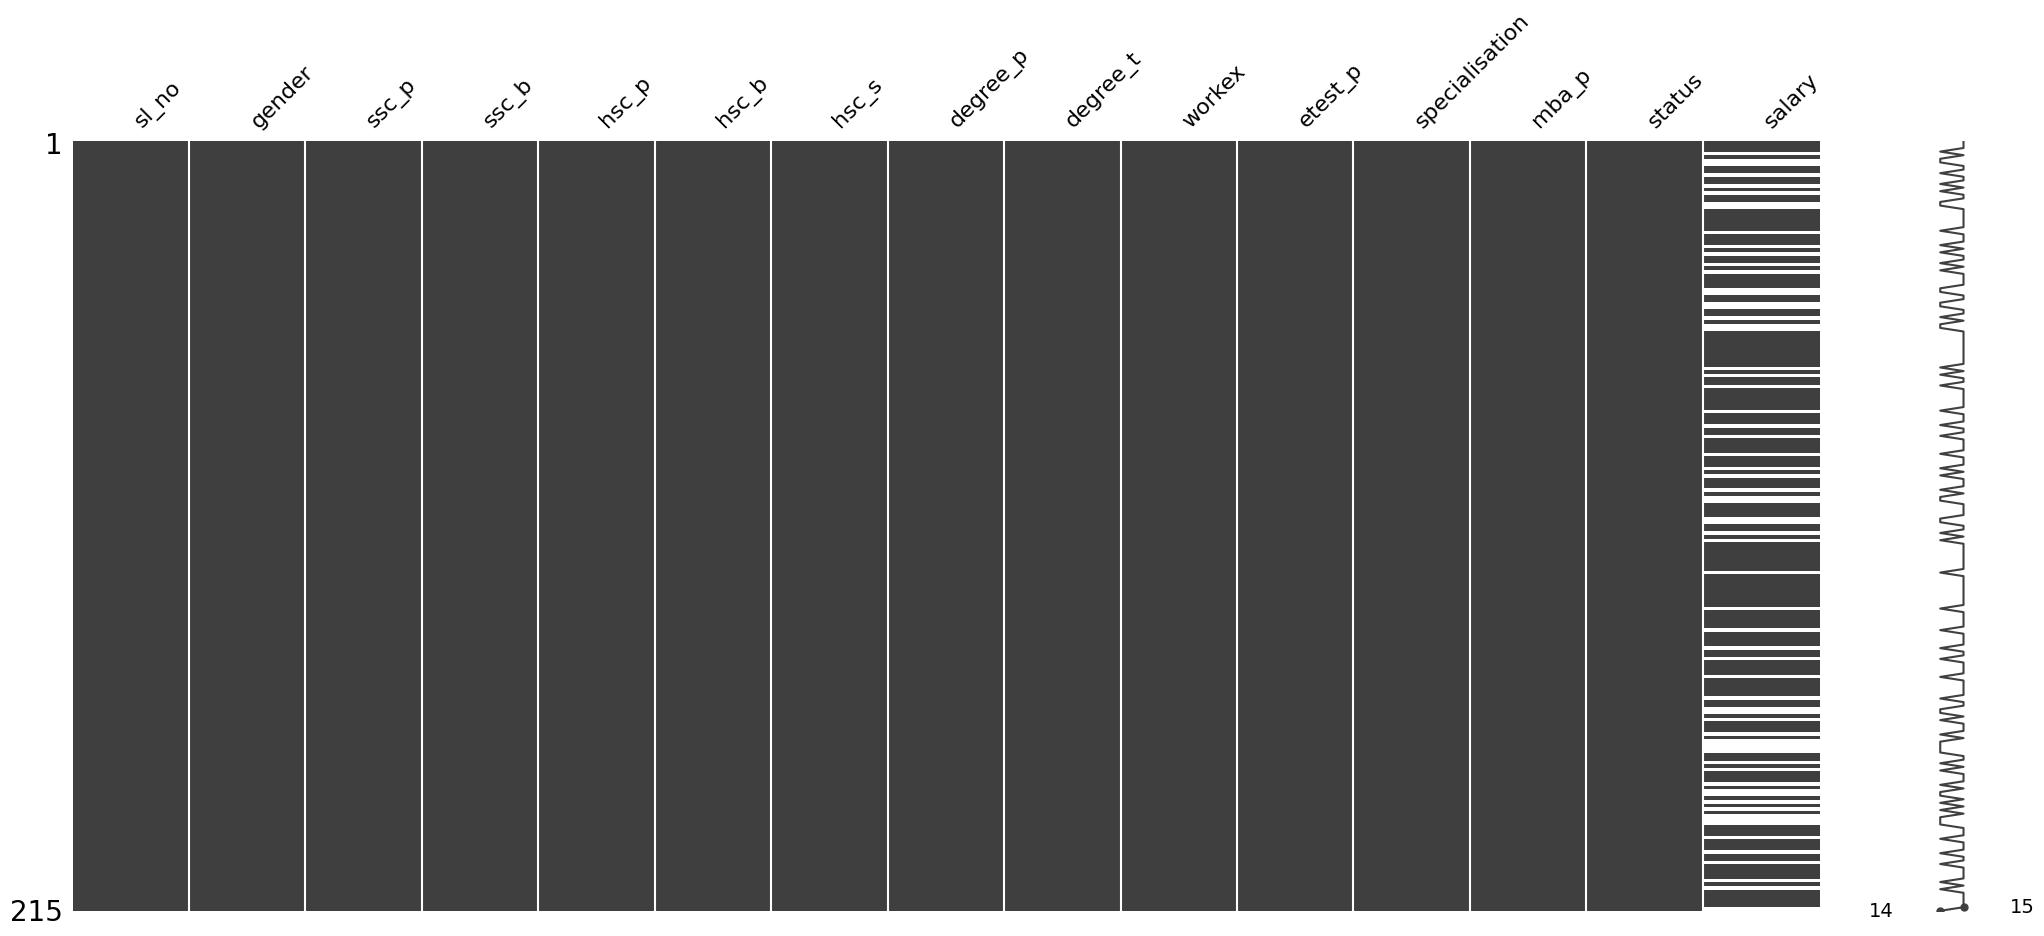

In [11]:
import missingno as msno
msno.matrix(dados)

In [12]:
dados.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [13]:
import seaborn as sb

C:\Users\Felippe\AppData\Local\Temp\ipykernel_21628\2258187790.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x='status', y='salary', data=dados, palette='hls')


<Axes: xlabel='status', ylabel='salary'>

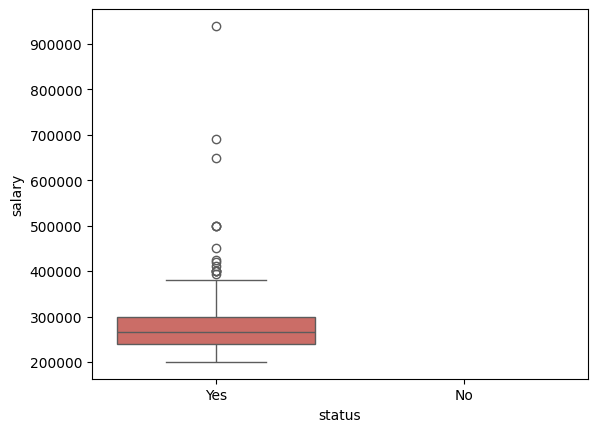

In [14]:
sb.boxplot(x='status', y='salary', data=dados, palette='hls')

**Inferência sobre os dados:**

Observe que para a variável salário, os valores nulos estão atribuídos a variável do tipo status quando o status é "não", ou seja, para os não contratados temos algumas pessoas da base sem salário atribuído.

Como podemos realizar a tratativa dos valores nulos?

In [15]:
dados['salary'].fillna(value=0, inplace=True)

C:\Users\Felippe\AppData\Local\Temp\ipykernel_21628\2749700837.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados['salary'].fillna(value=0, inplace=True)


In [16]:
dados.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

**Avaliando as variáveis numéricas:**

Vamos analisar e cmopreender a distribuição dos dados para cada metrica de pontuação de ensino. Será que temos outliers na base ?

<Axes: xlabel='hsc_p'>

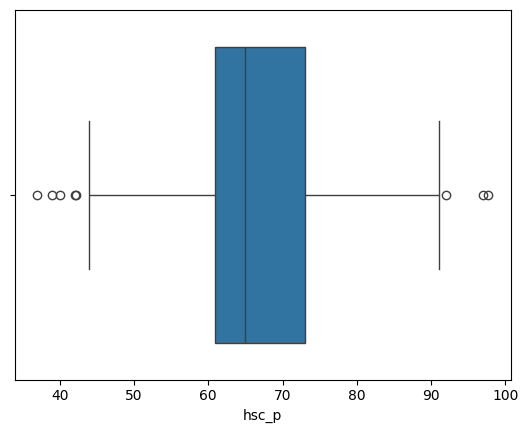

In [17]:
sb.boxplot(x=dados['hsc_p'])

<Axes: xlabel='hsc_p', ylabel='Count'>

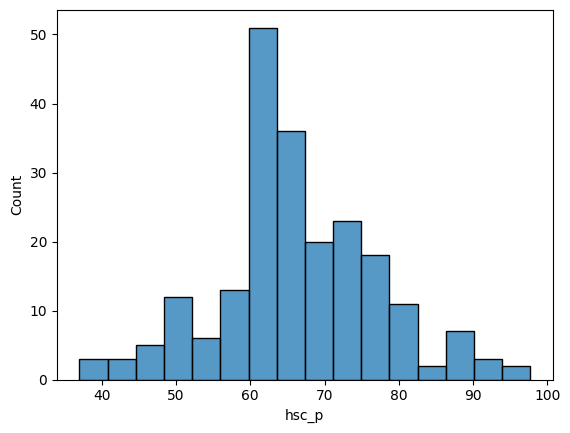

In [18]:
sb.histplot(data=dados, x='hsc_p')

<Axes: xlabel='degree_p'>

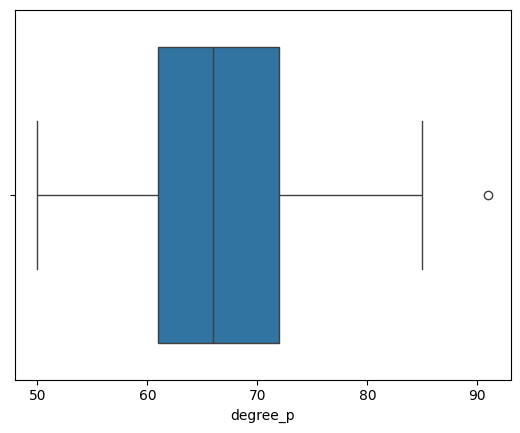

In [19]:
sb.boxplot(x=dados['degree_p'])

<Axes: xlabel='degree_p', ylabel='Count'>

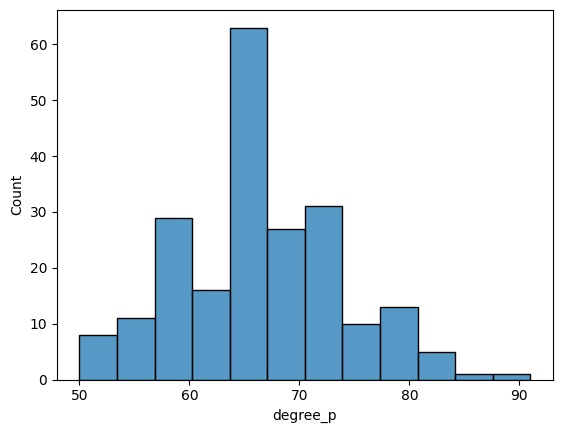

In [20]:
sb.histplot(data=dados, x='degree_p')

<Axes: xlabel='etest_p'>

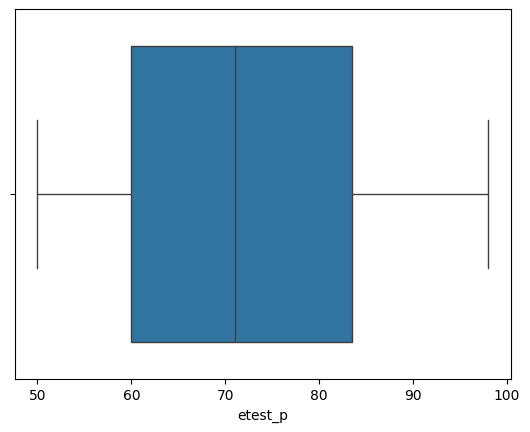

In [21]:
sb.boxplot(x=dados['etest_p'])

<Axes: xlabel='etest_p', ylabel='Count'>

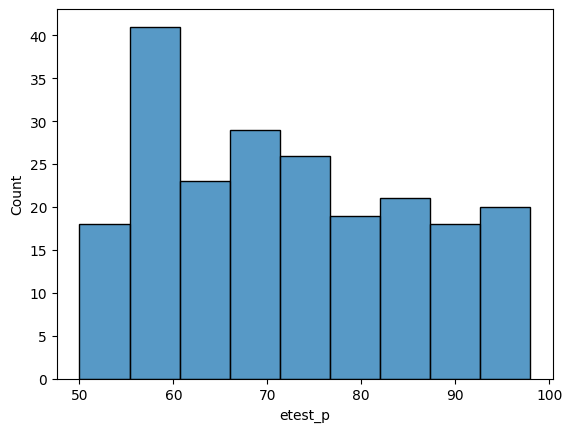

In [22]:
sb.histplot(data=dados, x='etest_p')

<Axes: xlabel='mba_p'>

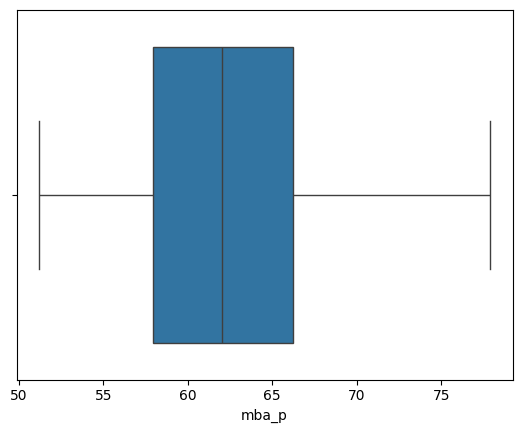

In [23]:
sb.boxplot(x=dados['mba_p'])

<Axes: xlabel='mba_p', ylabel='Count'>

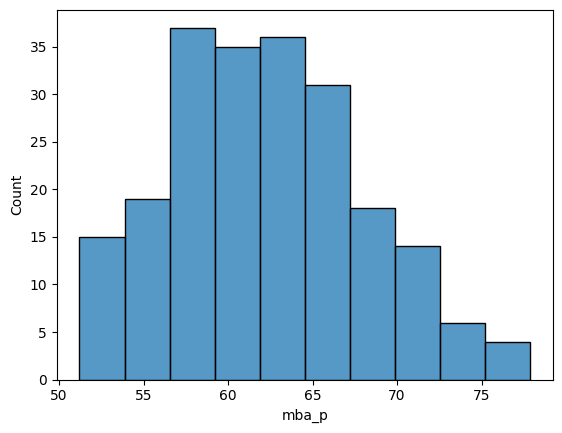

In [24]:
sb.histplot(data=dados, x='mba_p')

<Axes: xlabel='salary'>

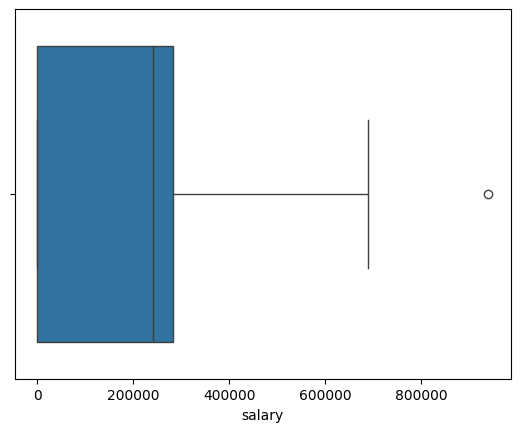

In [26]:
sb.boxplot(x=dados['salary'])

<Axes: xlabel='salary', ylabel='Count'>

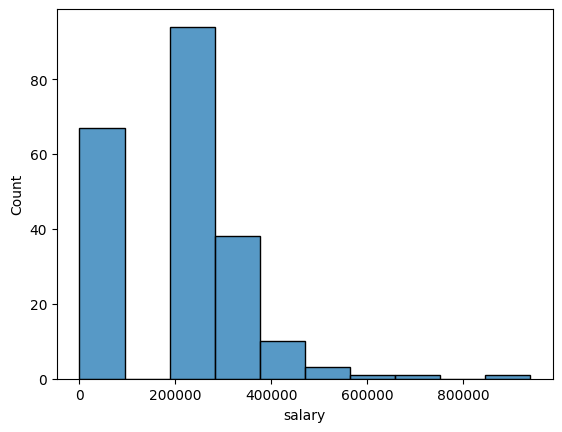

In [28]:
sb.histplot(data=dados,x='salary')

Será que os scores acadêmicos influenciam na contratação? E a experiência de trabalho?



[Text(36.25, 0.5, '')]

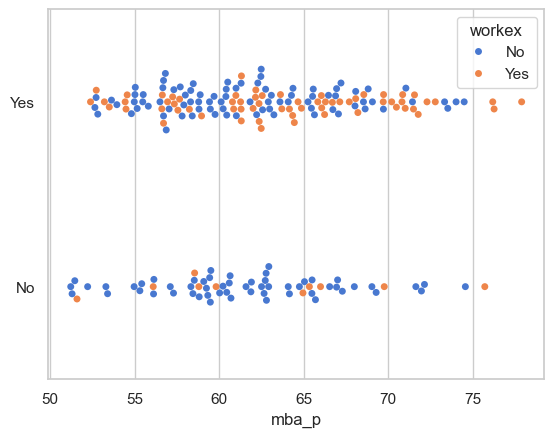

In [32]:
sb.set_theme(style='whitegrid', palette='muted')

ax = sb.swarmplot(data=dados, x="mba_p", y="status", hue="workex")
ax.set(ylabel='')

**Inferência dos dados:**

Podemos observar que a pontuação de MBA pode influência sim na decisão de contratação, temos um grande concetração de dados sobre profissionais que possuem score de mba_p e com esperiência de trabalho.

Existe algum viés de gênero ao oferecer remuneração?

In [33]:
!pip install plotly_express

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 9.9/9.9 MB 51.2 MB/s  0:00:00
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 9.6/9.6 MB 54.4 MB/s  0:00:00

   ---------------------------------------- 0/5 [patsy]
   ---------------------------------------- 0/5 [patsy]
   ---------------------------------------- 0/5 [patsy]
   -------- ------------------------------- 1/5 [narwhals]
   -------- ------------------------------- 1/5 [narwhals]
   -------- ------------------------------- 1/5 [narwhals]
   -------- ------------------------------- 1/5 [narwhals]
   -------- ------------------------------- 1/5 [narwhals]
   -------- ------------------------------- 1/5 [narwhals]
   -------- ------------------------------- 1/5 [narwhals]
   -------- ------------------------------- 1/5 [narwhals]
   -------- ------------------------------- 1/5 [narwhals]
   -------- --

In [34]:
import plotly_express as px

In [38]:
px.violin(dados,y="salary",x="specialisation",color="gender",box=True,points="all")

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'box': {'visible': True},
              'hovertemplate': 'gender=M<br>specialisation=%{x}<br>salary=%{y}<extra></extra>',
              'legendgroup': 'M',
              'marker': {'color': '#636efa'},
              'name': 'M',
              'offsetgroup': 'M',
              'orientation': 'v',
              'points': 'all',
              'scalegroup': 'True',
              'showlegend': True,
              'type': 'violin',
              'x': array(['Mkt&HR', 'Mkt&Fin', 'Mkt&Fin', 'Mkt&HR', 'Mkt&Fin', 'Mkt&Fin',
                          'Mkt&Fin', 'Mkt&Fin', 'Mkt&Fin', 'Mkt&HR', 'Mkt&Fin', 'Mkt&HR',
                          'Mkt&Fin', 'Mkt&Fin', 'Mkt&HR', 'Mkt&Fin', 'Mkt&Fin', 'Mkt&HR',
                          'Mkt&Fin', 'Mkt&Fin', 'Mkt&HR', 'Mkt&Fin', 'Mkt&Fin', 'Mkt&Fin',
                          'Mkt&HR', 'Mkt&Fin', 'Mkt&Fin', 'Mkt&HR', 'Mkt&HR', 'Mkt&HR', 'Mkt&Fin',
                          'Mkt&Fin', 'Mkt&Fin', 'Mkt&Fin', 'Mkt&Fin', 'Mkt&Fin', 'Mkt&HR',
                          'Mkt&Fin', 'Mkt&HR', 'Mkt&HR', 'Mkt&Fin', 'Mkt&Fin', 'Mkt&Fin',
                          'Mkt&Fin', 'Mkt&Fin', 'Mkt&Fin', 'Mkt&Fin', 'Mkt&Fin', 'Mkt&Fin',
                          'Mkt&Fin', 'Mkt&Fin', 'Mkt&Fin', 'Mkt&Fin', 'Mkt&Fin', 'Mkt&HR',
                          'Mkt&HR', 'Mkt&HR', 'Mkt&Fin', 'Mkt&Fin', 'Mkt&Fin', 'Mkt&HR', 'Mkt&HR',
                          'Mkt&HR', 'Mkt&HR', 'Mkt&Fin', 'Mkt&HR', 'Mkt&Fin', 'Mkt&HR', 'Mkt&HR',
                          'Mkt&HR', 'Mkt&HR', 'Mkt&Fin', 'Mkt&Fin', 'Mkt&HR', 'Mkt&Fin', 'Mkt&HR',
                          'Mkt&HR', 'Mkt&HR', 'Mkt&HR', 'Mkt&Fin', 'Mkt&Fin', 'Mkt&HR', 'Mkt&HR',
                          'Mkt&HR', 'Mkt&Fin', 'Mkt&Fin', 'Mkt&HR', 'Mkt&Fin', 'Mkt&Fin',
                          'Mkt&Fin', 'Mkt&HR', 'Mkt&HR', 'Mkt&Fin', 'Mkt&HR', 'Mkt&Fin',
                          'Mkt&Fin', 'Mkt&Fin', 'Mkt&Fin', 'Mkt&HR', 'Mkt&HR', 'Mkt&Fin',
                          'Mkt&Fin', 'Mkt&HR', 'Mkt&HR', 'Mkt&HR', 'Mkt&Fin', 'Mkt&Fin', 'Mkt&HR',
                          'Mkt&Fin', 'Mkt&HR', 'Mkt&Fin', 'Mkt&HR', 'Mkt&Fin', 'Mkt&HR', 'Mkt&HR',
                          'Mkt&Fin', 'Mkt&HR', 'Mkt&Fin', 'Mkt&HR', 'Mkt&Fin', 'Mkt&Fin',
                          'Mkt&Fin', 'Mkt&Fin', 'Mkt&Fin', 'Mkt&HR', 'Mkt&Fin', 'Mkt&HR',
                          'Mkt&Fin', 'Mkt&HR', 'Mkt&HR', 'Mkt&HR', 'Mkt&Fin', 'Mkt&Fin',
                          'Mkt&Fin', 'Mkt&Fin', 'Mkt&Fin', 'Mkt&Fin', 'Mkt&Fin', 'Mkt&HR'],
                         dtype=object),
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('AAAAAMB6EEEAAAAAAGoIQQAAAACAhA' ... 'AA4MgQQQAAAABgARJBAAAAAAAAAAA='),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'box': {'visible': True},
              'hovertemplate': 'gender=F<br>specialisation=%{x}<br>salary=%{y}<extra></extra>',
              'legendgroup': 'F',
              'marker': {'color': '#EF553B'},
              'name': 'F',
              'offsetgroup': 'F',
              'orientation': 'v',
              'points': 'all',
              'scalegroup': 'True',
              'showlegend': True,
              'type': 'violin',
              'x': array(['Mkt&Fin', 'Mkt&HR', 'Mkt&Fin', 'Mkt&Fin', 'Mkt&Fin', 'Mkt&HR',
                          'Mkt&Fin', 'Mkt&HR', 'Mkt&Fin', 'Mkt&Fin', 'Mkt&HR', 'Mkt&HR', 'Mkt&HR',
                          'Mkt&Fin', 'Mkt&HR', 'Mkt&HR', 'Mkt&HR', 'Mkt&Fin', 'Mkt&HR', 'Mkt&Fin',
                          'Mkt&HR', 'Mkt&HR', 'Mkt&HR', 'Mkt&HR', 'Mkt&HR', 'Mkt&HR', 'Mkt&Fin',
                          'Mkt&HR', 'Mkt&HR', 'Mkt&Fin', 'Mkt&HR', 'Mkt&HR', 'Mkt&Fin', 'Mkt&HR',
                          'Mkt&HR', 'Mkt&Fin', 'Mkt&Fin', 'Mkt&Fin', 'Mkt&Fin', 'Mkt&Fin',
                          'Mkt&HR', 'Mkt&Fin', 'Mkt&HR', 'Mkt&Fin', 'Mkt&Fin', 'Mkt&HR',
                          'Mk

**Inferência sobre os dados:**

Os maiores salários foram dados aos homens. O salário médio oferecido também foi maior para homens.

Vamos analisar a correlação entre as pontuações de desempenho acadêmico com a contratação:

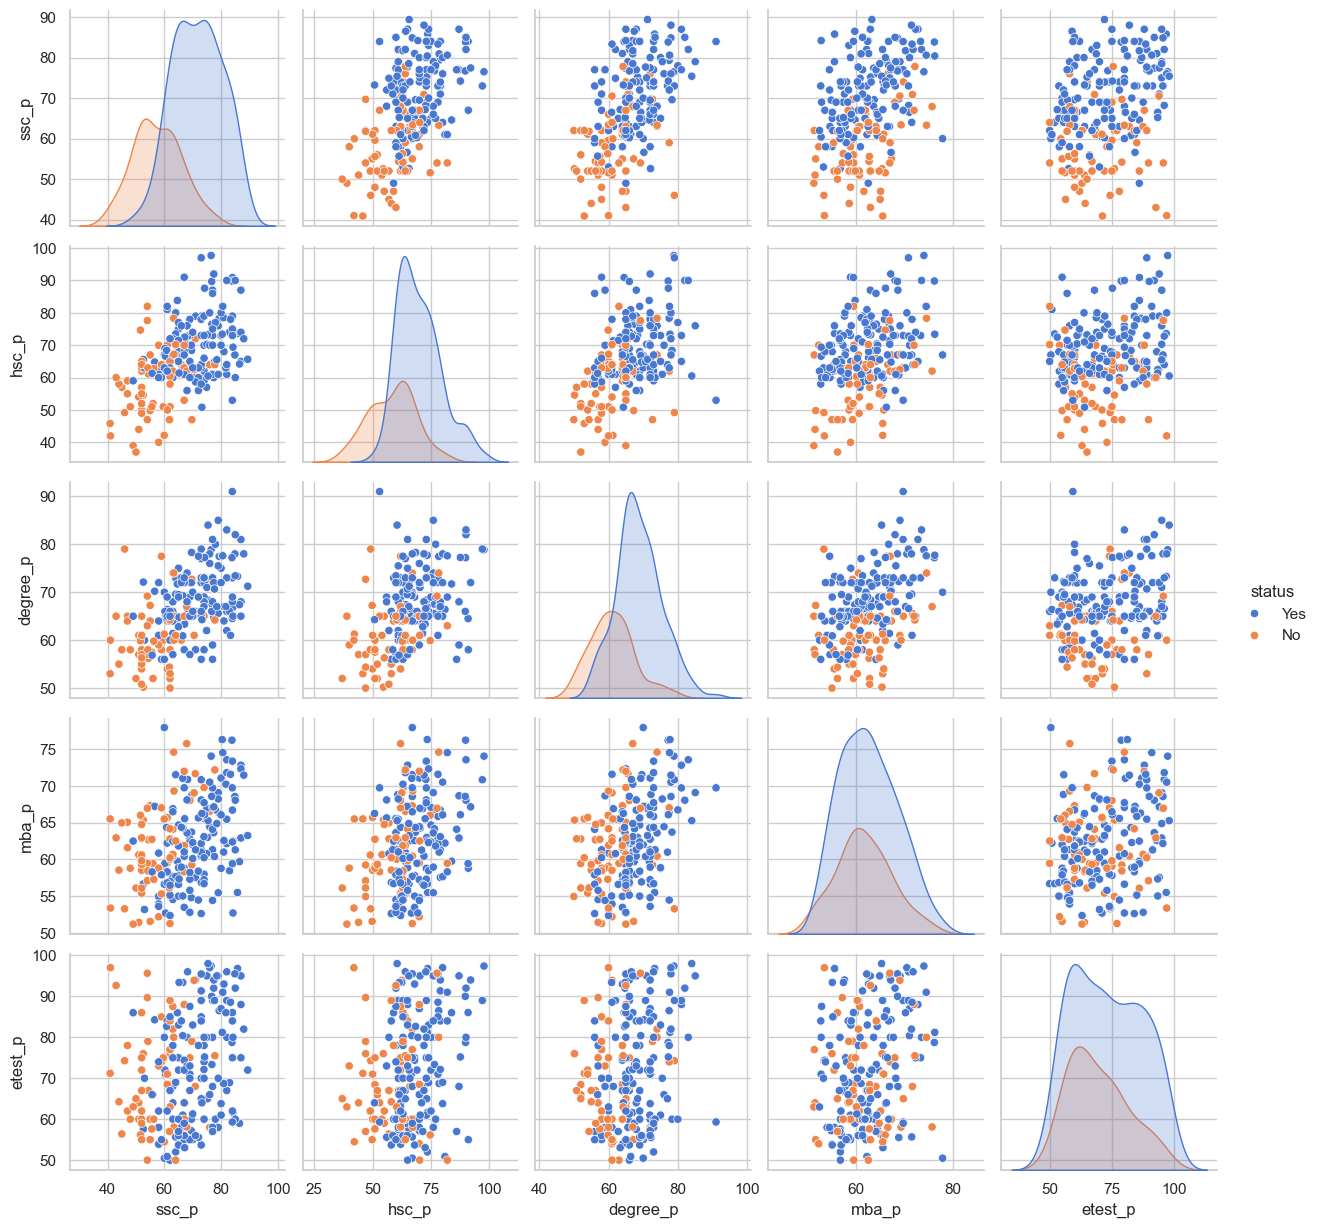

In [39]:
sb.pairplot(dados,vars=['ssc_p','hsc_p','degree_p','mba_p','etest_p'],hue="status")

**Inferência sobre os dados:**

Candidatos com pontuação alta no ensino médio e na graduação foram contratados. Quem obteve notas altas em suas escolas foi contratado.

In [42]:
import matplotlib.pyplot as plt

<Axes: >

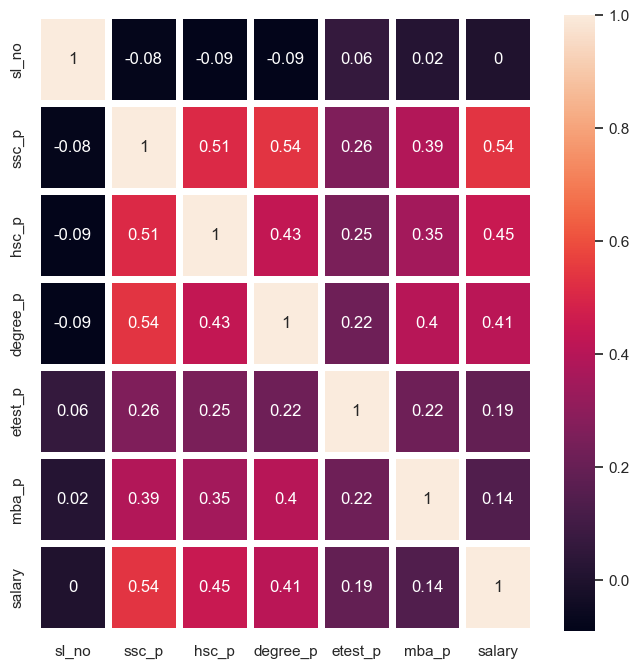

In [47]:
correlation_matrix = dados.select_dtypes(include=['number']).corr().round(2)
fig, ax = plt.subplots(figsize=(8,8))
sb.heatmap(data=correlation_matrix, annot=True, linewidths=5, ax=ax)

Aqui somente conseguimos analisar a correlação entre as variáveis numéricas. Será que não seria importante também entender a correlação com as variéveis numéricas?

Vamos aplicar técnicas de transformação nos dados:

Vamos utilizar label enconder para tratar variáveis categoricas que possuem apenas dois tipos de categorias, como genero, especialização e status.

Para as demais categorias, vamos aplicar a tecnica de one hot enconing.

In [48]:
from sklearn.preprocessing import LabelEncoder
dados.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Yes,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Yes,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Yes,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,No,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Yes,425000.0


In [49]:
colunas=['gender','workex','specialisation','status']

label_encoder = LabelEncoder()
for col in colunas:
    dados[col] = label_encoder.fit_transform(dados[col])
dados.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1,270000.0
1,2,1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,86.5,0,66.28,1,200000.0
2,3,1,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1,250000.0
3,4,1,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,66.0,1,59.43,0,0.0
4,5,1,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,1,425000.0


In [52]:
#One Hot Encoder
dummy_hsc_s = pd.get_dummies(dados['hsc_s'], dtype=int, prefix='dummy')
dummy_degree_t = pd.get_dummies(dados['degree_t'], dtype=int, prefix='dummy')

dados_coeded = pd.concat([dados, dummy_hsc_s, dummy_degree_t], axis=1)
dados_coeded.drop(['hsc_s','degree_t','salary'],axis=1, inplace=True)
dados_coeded.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,1,1,67.00,Others,91.00,Others,58.00,0,55.0,1,58.80,1,0,1,0,0,0,1
1,2,1,79.33,Central,78.33,Others,77.48,1,86.5,0,66.28,1,0,0,1,0,0,1
2,3,1,65.00,Central,68.00,Central,64.00,0,75.0,0,57.80,1,1,0,0,1,0,0
3,4,1,56.00,Central,52.00,Central,52.00,0,66.0,1,59.43,0,0,0,1,0,0,1
4,5,1,85.80,Central,73.60,Central,73.30,0,96.8,0,55.50,1,0,1,0,1,0,0


<Axes: >

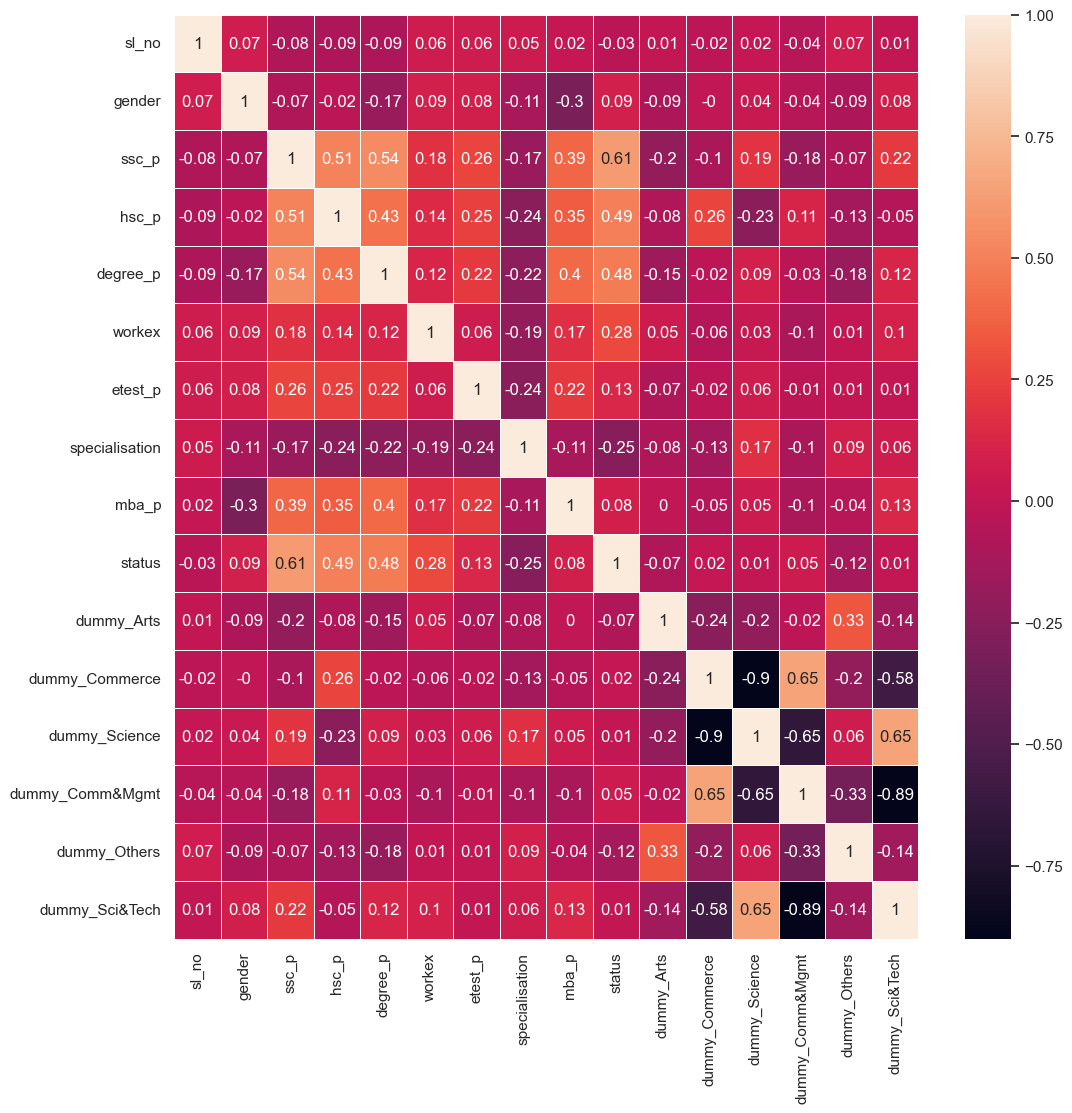

In [59]:
correlation_matrix = dados_coeded.select_dtypes(include=['number']).corr().round(2)

fig, ax = plt.subplots(figsize=(12,12))
sb.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)


Agora, conseguimos analisar as correlações!

Analisando a correlação e a análise de dados, podemos considerar algumas variáveis como possíveis fortes features para nosso modelo de classificação!

Mas lembre-se, correlação não é causalidade!

Analisando algumas variáveis e sua correlação com a variável status, podemos identificar que as variáveis workex, degree_p, hsc_p e ssc_p possuem uma correlação interessante na contratação.

A maior correlação de status de contratação está com o score de ssc_p, ou seja, pessoas com alto score de ssc_p são mais contratadas.

Vamos analisar?

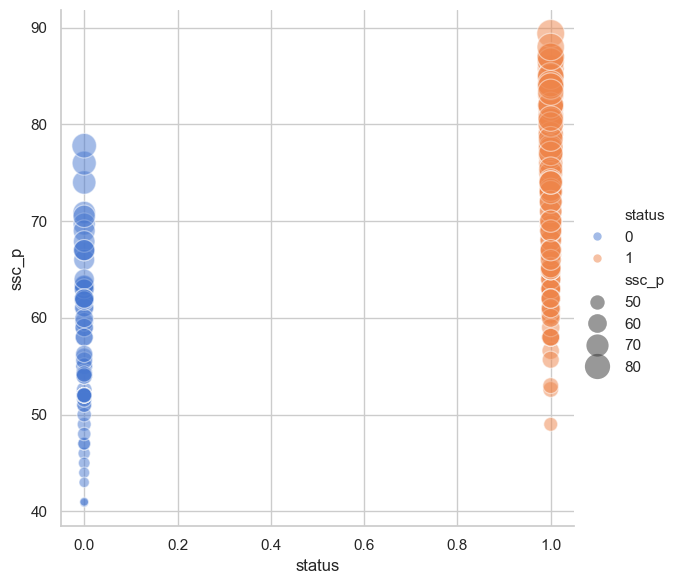

In [60]:
sb.relplot(x='status', y='ssc_p', hue='status', size='ssc_p',
           sizes=(40,400), alpha=.5, palette='muted',
           height=6, data=dados_coeded)

In [61]:
X = dados_coeded[['ssc_p', 'hsc_p', 'degree_p', 'workex', 'mba_p']] #variaveis independentes
y = dados_coeded['status'] #target

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier # knn

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [64]:
X_train.shape

(172, 5)

In [66]:
X_test.shape

(43, 5)

In [67]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()

In [68]:
scaler.fit(X_train)
X_train_escalonado = scaler.transform(X_train)
X_test_escalonado = scaler.transform(X_test)

In [69]:
import numpy as np
error = []

In [70]:
#Calculando error for K
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_escalonado, y_train)
    pred_i = knn.predict(X_test_escalonado)
    error.append(np.mean(pred_i != y_test))

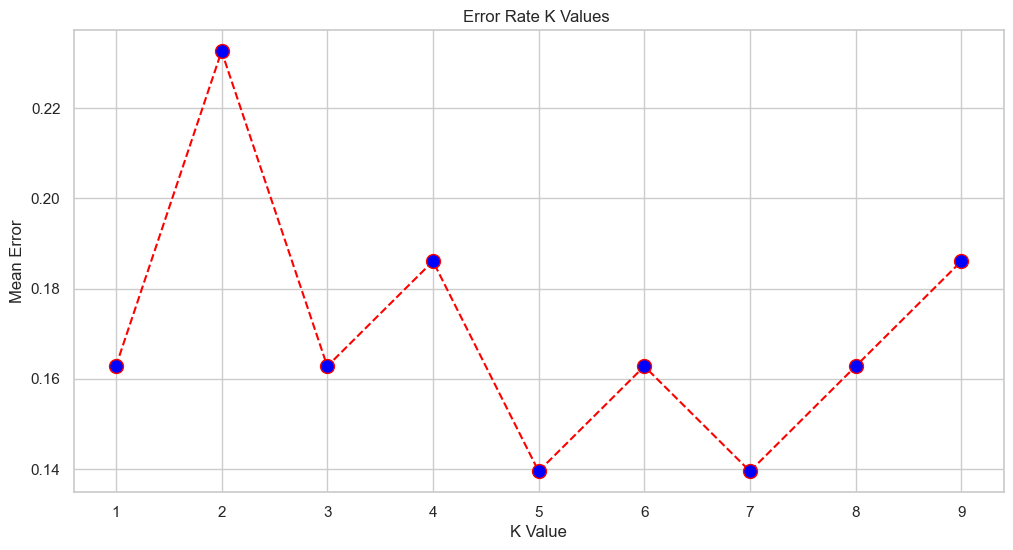

In [71]:
plt.figure(figsize=(12,6))
plt.plot(range(1,10), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Values ')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

In [73]:

modelo_classificador = KNeighborsClassifier(n_neighbors=5)

modelo_classificador.fit(X_train_escalonado, y_train) 

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [74]:
y_predito = modelo_classificador.predict(X_test_escalonado) 


In [75]:
y_predito


array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0])

In [76]:
from sklearn.metrics import accuracy_score

In [77]:
print(accuracy_score(y_test, y_predito))

0.8604651162790697


In [80]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC


In [81]:
svm = Pipeline([
    ("linear_svc", LinearSVC(C=1))
])

svm.fit(X_train_escalonado, y_train)

,steps,"[('linear_svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1
,multi_class,'ovr'
,fit_intercept,True


In [82]:
y_predito_svm = svm.predict(X_test_escalonado)

In [83]:
print(accuracy_score(y_test, y_predito_svm))

0.8604651162790697


In [84]:

from sklearn import metrics
from sklearn.metrics import roc_curve, auc

In [85]:
y_prob = modelo_classificador.predict_proba(x_test)[:,1] 


NameError: name 'x_test' is not defined

In [87]:
from sklearn.svm import SVC

poly_svm = Pipeline([
    ("svm", SVC(kernel="poly", degree=3, coef0=1, C=5))
])
svm.fit(X_train, y_train)


,steps,"[('linear_svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1
,multi_class,'ovr'
,fit_intercept,True
